In [1]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt

In [2]:
date = 'oct-2'
with open('../data/universe-' + date + '.json') as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))

df_url = pd.json_normalize(data)
df_url = df_url[['_source.url', '_source.title', '_source.body', '_source.status', '_source.time']]
df_url.rename(columns = {'_source.url':'url', '_source.title':'title', '_source.body':'body', 
                         '_source.status':'status', '_source.time':'time'}, inplace = True) 
df_url['url'] = df_url['url'].str.strip('/')
df_url = df_url[df_url['status'] != 'todo']
df_url

,url,title,body,status,time
0,2zljltoqfdkqcdmf.onion,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:47.370962464Z
1,4zyfu5qr3xg66ape.onion,Black Shop,"<!DOCTYPE html>\n<head>\n <meta charset=""ut...",live,2020-09-29T03:31:47.79917865Z
2,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...,CHEAP EUROS,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",live,2020-09-29T03:31:47.85466791Z
3,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...,Walt Cards - Gift Card seller since 2013,<!DOCTYPE html>\r\n<html>\r\n\t<!-- Mirrored f...,live,2020-09-29T03:31:46.54407746Z
4,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:46.748995354Z
...,...,...,...,...,...
1207539,636ejdq25ijtcmka.onion/wp-content/themes/estor...,,.toggle-wrap {\r\n\tfloat: right;\r\n\tdisplay...,live,2020-09-30T02:08:07.963948388Z
1207550,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,HOME - EURASIAN UNDERGROUND FIREARMS MARKET ( ...,"\n<!DOCTYPE html>\n<html class=""html"" lang=""en...",live,2020-09-30T02:08:20.161147879Z
1207576,636ejdq25ijtcmka.onion/index.php/product/count...,Counterfeit US Dollar Banknotes - BLACKMARKET ...,"<!DOCTYPE html>\r\n<html lang=""en-US"">\r\n<hea...",live,2020-09-30T02:08:20.319630406Z
1207580,636ejdq25ijtcmka.onion/wp-content/plugins/adva...,,"advads={supports_localstorage:function(){""use ...",live,2020-09-30T02:08:20.61036072Z


In [3]:
domains = df_url['url'].str.split('.onion', n = 1, expand = True)
df_url['domain'] = domains[0]
df_url

,url,title,body,status,time,domain
0,2zljltoqfdkqcdmf.onion,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:47.370962464Z,2zljltoqfdkqcdmf
1,4zyfu5qr3xg66ape.onion,Black Shop,"<!DOCTYPE html>\n<head>\n <meta charset=""ut...",live,2020-09-29T03:31:47.79917865Z,4zyfu5qr3xg66ape
2,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...,CHEAP EUROS,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",live,2020-09-29T03:31:47.85466791Z,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...
3,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...,Walt Cards - Gift Card seller since 2013,<!DOCTYPE html>\r\n<html>\r\n\t<!-- Mirrored f...,live,2020-09-29T03:31:46.54407746Z,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...
4,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:46.748995354Z,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...
...,...,...,...,...,...,...
1207539,636ejdq25ijtcmka.onion/wp-content/themes/estor...,,.toggle-wrap {\r\n\tfloat: right;\r\n\tdisplay...,live,2020-09-30T02:08:07.963948388Z,636ejdq25ijtcmka
1207550,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,HOME - EURASIAN UNDERGROUND FIREARMS MARKET ( ...,"\n<!DOCTYPE html>\n<html class=""html"" lang=""en...",live,2020-09-30T02:08:20.161147879Z,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...
1207576,636ejdq25ijtcmka.onion/index.php/product/count...,Counterfeit US Dollar Banknotes - BLACKMARKET ...,"<!DOCTYPE html>\r\n<html lang=""en-US"">\r\n<hea...",live,2020-09-30T02:08:20.319630406Z,636ejdq25ijtcmka
1207580,636ejdq25ijtcmka.onion/wp-content/plugins/adva...,,"advads={supports_localstorage:function(){""use ...",live,2020-09-30T02:08:20.61036072Z,636ejdq25ijtcmka


In [4]:
df_url_unique = df_url.drop_duplicates(subset ='url', keep = 'first')
df_url_unique

,url,title,body,status,time,domain
0,2zljltoqfdkqcdmf.onion,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:47.370962464Z,2zljltoqfdkqcdmf
1,4zyfu5qr3xg66ape.onion,Black Shop,"<!DOCTYPE html>\n<head>\n <meta charset=""ut...",live,2020-09-29T03:31:47.79917865Z,4zyfu5qr3xg66ape
2,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...,CHEAP EUROS,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",live,2020-09-29T03:31:47.85466791Z,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...
3,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...,Walt Cards - Gift Card seller since 2013,<!DOCTYPE html>\r\n<html>\r\n\t<!-- Mirrored f...,live,2020-09-29T03:31:46.54407746Z,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...
4,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:46.748995354Z,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...
...,...,...,...,...,...,...
1206158,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,,"!function(n){window.isEditMode=!1,n(window).on...",live,2020-09-30T02:09:56.213964118Z,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...
1206282,greenegbqkyk3ois.onion/wp-content/uploads/2020...,,���� JFIF  ` `  �� ;CREATOR: gd-jpeg v1.0 ...,live,2020-09-30T02:10:00.029866451Z,greenegbqkyk3ois
1206325,greenegbqkyk3ois.onion/wp-content/plugins/cont...,,.wpcf7 .screen-reader-response {\n\tposition: ...,live,2020-09-30T02:09:59.250307811Z,greenegbqkyk3ois
1206464,ctulnc6kyxkgt7fg.onion/carder-forum/14886-easy...,Easy ways to earn money as a teenager,"<!DOCTYPE html>\n<html lang=""en"">\n\t<head>\n\...",live,2020-09-30T02:09:56.863479772Z,ctulnc6kyxkgt7fg


In [5]:
df_domain_unique = df_url_unique.copy()
df_domain_unique.reset_index(inplace=True)
df_domain_unique = df_domain_unique[['title', 'url', 'status', 'domain']]
df_domain_unique = df_domain_unique.groupby('domain').agg(list)
df_domain_unique.reset_index(inplace=True)
df_domain_unique['count'] = df_domain_unique['url'].str.len()
df_domain_unique.sort_values(by='count', ascending=False, inplace=True)
df_domain_unique

,domain,title,url,status,count
1452,636ejdq25ijtcmka,[Black Market Activities Marketplace Buy Fullz...,"[636ejdq25ijtcmka.onion, 636ejdq25ijtcmka.onio...","[live, live, live, live, live, live, live, liv...",1599
2216,aoh5yljyr2gawvz6isodr3yp4wfb5ghml4bunjymys24vz...,"[Empire Market, , , , , , , , , , , , , 10 x F...",[aoh5yljyr2gawvz6isodr3yp4wfb5ghml4bunjymys24v...,"[live, live, live, live, live, live, live, liv...",608
298,2azus2ydchjmz5l5fcjmhew4elucd72wwwaqpswni3wiyb...,[Démocratie Participative &#8211; 卐 Le site le...,[2azus2ydchjmz5l5fcjmhew4elucd72wwwaqpswni3wiy...,"[live, live, live, live, live, live, live, liv...",384
766,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,[HOME - EURASIAN UNDERGROUND FIREARMS MARKET (...,[3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjr...,"[live, live, live, live, live, live, live, liv...",325
2502,bibliotgj7uoalolnsxwebynomyz4jwqibaq4hsgl5tnhp...,"[ Biblioth&egrave;que., , , , , , , , , , , , ...",[bibliotgj7uoalolnsxwebynomyz4jwqibaq4hsgl5tnh...,"[live, dead, dead, dead, dead, dead, dead, dea...",317
...,...,...,...,...,...
3161,d5kqtj2xduc7loiv,[Onion Link List | Main Page],[d5kqtj2xduc7loiv.onion],[live],1
3160,d5jqpvxnjggfgmh67w3vbouuopvio6c37qwlwdsosp7rc2...,[All BTC .:. Everything you needed],[d5jqpvxnjggfgmh67w3vbouuopvio6c37qwlwdsosp7rc...,[live],1
3159,d5j47z7fy33f5rhdenhkpd5wuj4xdnh66f43cgglo5xw74...,[Payway - Secure Transfers],[d5j47z7fy33f5rhdenhkpd5wuj4xdnh66f43cgglo5xw7...,[live],1
3158,d5fxjzrvhhg6hpa4svm2bnl2h337is5gywkbs4jzb6dgcb...,[Paypal Account],[d5fxjzrvhhg6hpa4svm2bnl2h337is5gywkbs4jzb6dgc...,[live],1


In [6]:
df_url_live_unique = df_url_unique[df_url_unique['status'] == 'live']
df_url_live_unique

,url,title,body,status,time,domain
0,2zljltoqfdkqcdmf.onion,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:47.370962464Z,2zljltoqfdkqcdmf
1,4zyfu5qr3xg66ape.onion,Black Shop,"<!DOCTYPE html>\n<head>\n <meta charset=""ut...",live,2020-09-29T03:31:47.79917865Z,4zyfu5qr3xg66ape
2,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...,CHEAP EUROS,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",live,2020-09-29T03:31:47.85466791Z,6wlf4cyhq4u6rlqzngh3g6qrun4l3sf6yf54ez7eo2547k...
3,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...,Walt Cards - Gift Card seller since 2013,<!DOCTYPE html>\r\n<html>\r\n\t<!-- Mirrored f...,live,2020-09-29T03:31:46.54407746Z,6khquuorwuucomnxp5egqfolpeddgjfbacpxyrjkbgftng...
4,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...,Light Money,<!doctype html>\n<html>\n\n<head>\n <meta c...,live,2020-09-29T03:31:46.748995354Z,5oesgn7p2zu6wpaavujjpold2sccpu7oia4afp24adujzt...
...,...,...,...,...,...,...
1206158,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,,"!function(n){window.isEditMode=!1,n(window).on...",live,2020-09-30T02:09:56.213964118Z,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...
1206282,greenegbqkyk3ois.onion/wp-content/uploads/2020...,,���� JFIF  ` `  �� ;CREATOR: gd-jpeg v1.0 ...,live,2020-09-30T02:10:00.029866451Z,greenegbqkyk3ois
1206325,greenegbqkyk3ois.onion/wp-content/plugins/cont...,,.wpcf7 .screen-reader-response {\n\tposition: ...,live,2020-09-30T02:09:59.250307811Z,greenegbqkyk3ois
1206464,ctulnc6kyxkgt7fg.onion/carder-forum/14886-easy...,Easy ways to earn money as a teenager,"<!DOCTYPE html>\n<html lang=""en"">\n\t<head>\n\...",live,2020-09-30T02:09:56.863479772Z,ctulnc6kyxkgt7fg


In [7]:
df_url_dead_unique = df_url_unique[df_url_unique['status'] == 'dead']
df_url_dead_unique

,url,title,body,status,time,domain
282,74h7fi5h53zkxpr2.onion,,,dead,2020-09-29T03:32:33.756333886Z,74h7fi5h53zkxpr2
316,7krwgbc4vfdhmyxtt5iajc7mzzvden6llkk6ppjzd64ojh...,,,dead,2020-09-29T03:32:53.618823845Z,7krwgbc4vfdhmyxtt5iajc7mzzvden6llkk6ppjzd64ojh...
385,6hrtx7iy6ekhxoav.onion,,,dead,2020-09-29T03:33:51.133979506Z,6hrtx7iy6ekhxoav
422,5w3i6vvxolzm5s5o.onion,,,dead,2020-09-29T03:33:57.329442947Z,5w3i6vvxolzm5s5o
559,a4yedjgciupu7zzt.onion,,,dead,2020-09-29T03:34:40.013390232Z,a4yedjgciupu7zzt
...,...,...,...,...,...,...
1200425,lq25jsnust6v25wcq72knsgaavtt4hibeph7pbwk3sx7hu...,,,dead,2020-09-30T02:15:14.422945795Z,lq25jsnust6v25wcq72knsgaavtt4hibeph7pbwk3sx7hu...
1203208,636ejdq25ijtcmka.onion/index.php/product/emv-s...,,,dead,2020-09-30T02:07:57.85047869Z,636ejdq25ijtcmka
1203979,akaoxb4ek4hm7vau.onion/logo.png,,,dead,2020-09-30T02:10:16.160451658Z,akaoxb4ek4hm7vau
1205621,irc://e2ymwjy6mzy4hx3t.onion:6669,,,dead,2020-09-30T02:09:29.784847262Z,irc://e2ymwjy6mzy4hx3t


In [8]:
mask = df_domain_unique['status'].apply(lambda x: 'live' in x)
df_domain_live_unique = df_domain_unique[mask]
df_domain_live_unique

,domain,title,url,status,count
1452,636ejdq25ijtcmka,[Black Market Activities Marketplace Buy Fullz...,"[636ejdq25ijtcmka.onion, 636ejdq25ijtcmka.onio...","[live, live, live, live, live, live, live, liv...",1599
2216,aoh5yljyr2gawvz6isodr3yp4wfb5ghml4bunjymys24vz...,"[Empire Market, , , , , , , , , , , , , 10 x F...",[aoh5yljyr2gawvz6isodr3yp4wfb5ghml4bunjymys24v...,"[live, live, live, live, live, live, live, liv...",608
298,2azus2ydchjmz5l5fcjmhew4elucd72wwwaqpswni3wiyb...,[Démocratie Participative &#8211; 卐 Le site le...,[2azus2ydchjmz5l5fcjmhew4elucd72wwwaqpswni3wiy...,"[live, live, live, live, live, live, live, liv...",384
766,3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjrn...,[HOME - EURASIAN UNDERGROUND FIREARMS MARKET (...,[3qr37zaumlym2jhcwkkqrarihdze2zp2xmmer4btkfqjr...,"[live, live, live, live, live, live, live, liv...",325
2502,bibliotgj7uoalolnsxwebynomyz4jwqibaq4hsgl5tnhp...,"[ Biblioth&egrave;que., , , , , , , , , , , , ...",[bibliotgj7uoalolnsxwebynomyz4jwqibaq4hsgl5tnh...,"[live, dead, dead, dead, dead, dead, dead, dea...",317
...,...,...,...,...,...
3162,d5nrlqeeogkcirih36xzwsqsjd5unwbi7ih6re275iissa...,[LordPay - Easy Transfers],[d5nrlqeeogkcirih36xzwsqsjd5unwbi7ih6re275iiss...,[live],1
3161,d5kqtj2xduc7loiv,[Onion Link List | Main Page],[d5kqtj2xduc7loiv.onion],[live],1
3160,d5jqpvxnjggfgmh67w3vbouuopvio6c37qwlwdsosp7rc2...,[All BTC .:. Everything you needed],[d5jqpvxnjggfgmh67w3vbouuopvio6c37qwlwdsosp7rc...,[live],1
3159,d5j47z7fy33f5rhdenhkpd5wuj4xdnh66f43cgglo5xw74...,[Payway - Secure Transfers],[d5j47z7fy33f5rhdenhkpd5wuj4xdnh66f43cgglo5xw7...,[live],1


In [9]:
df_domain_dead_unique = df_domain_unique[~df_domain_unique.index.isin(df_domain_live_unique.index)]
df_domain_dead_unique

,domain,title,url,status,count
6354,mn7wx6ixcsgruv6n,"[, , , , , , , , , , , , , , , , , , , , , , ,...","[mn7wx6ixcsgruv6n.onion/product/69, mn7wx6ixcs...","[dead, dead, dead, dead, dead, dead, dead, dea...",31
952,4eiruntyxxbgfv7o,"[, , , , , , , , , , , , , , , , , , , , , , ]","[4eiruntyxxbgfv7o.onion/snapbbs/237d0738, 4eir...","[dead, dead, dead, dead, dead, dead, dead, dea...",23
9149,xqz3u5drneuzhaeo,"[, , , , , , , , , , , , , , , , , , , , ]","[xqz3u5drneuzhaeo.onion/users/a42, xqz3u5drneu...","[dead, dead, dead, dead, dead, dead, dead, dea...",21
8428,t3j2fybcjso3xnmm,"[, , , , , , , , , , , , , , , , , , ]","[t3j2fybcjso3xnmm.onion/product/67, t3j2fybcjs...","[dead, dead, dead, dead, dead, dead, dead, dea...",19
615,3ay53nhsdrbu4ejgr6267eyg3rptqjiqibnuzxoiuaakcs...,"[, , , , , , , , , , ]",[3ay53nhsdrbu4ejgr6267eyg3rptqjiqibnuzxoiuaakc...,"[dead, dead, dead, dead, dead, dead, dead, dea...",11
...,...,...,...,...,...
3171,d6e2y226dzvt24dn,[],[d6e2y226dzvt24dn.onion],[dead],1
3169,d6dxfaisuj2wbujj,[],[d6dxfaisuj2wbujj.onion],[dead],1
3165,d5zsg6hh5kmvzpb5,[],[d5zsg6hh5kmvzpb5.onion],[dead],1
3164,d5rtvmy77l47zoll,[],[d5rtvmy77l47zoll.onion],[dead],1


In [10]:
df_url_duplicate = df_url.copy()
df_url_duplicate.reset_index(inplace=True)
df_url_duplicate = df_url_duplicate.groupby('url').agg({'title':'first', 'time':';'.join})
df_url_duplicate.reset_index(inplace=True)
df_url_duplicate['time'] = df_url_duplicate['time'].str.split(';')
df_url_duplicate['count'] = df_url_duplicate['time'].str.len()
df_url_duplicate = df_url_duplicate[df_url_duplicate['count'] > 1]
df_url_duplicate

,url,title,time,count
24,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...,Best Financial Market,"[2020-09-29T03:03:12.126405562Z, 2020-09-29T05...",145
25,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...,Amazon Gift Cards - Imperial Store,"[2020-09-29T05:12:49.054807658Z, 2020-09-29T16...",5
26,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...,Cloned Credit Card x1 - Imperial Store,"[2020-09-29T04:58:04.26810043Z, 2020-09-29T21:...",7
27,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...,Cloned Credit Cards x3 - Imperial Store,"[2020-09-29T04:58:05.454950408Z, 2020-09-29T21...",6
28,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...,Cloned Credit Cards x5 - Imperial Store,"[2020-09-29T05:34:18.67006433Z, 2020-09-29T19:...",3
...,...,...,...,...
18448,zqktlwiuavvvqqt4ybvgvi7tyo4hjl5xgfuvpdf6otjiyc...,,"[2020-09-29T16:47:08.258337531Z, 2020-09-29T15...",2
18458,zw5snxarvt66el1krkawdh5q7u5rdtm1rremepk1pxpcav...,,"[2020-09-29T20:00:37.907660042Z, 2020-09-29T22...",3
18459,zw5snxarvt66el3ej5rdjjzk7frgf5tvk2enwc3yx2qq45...,"Shop cloned cards, paypal, western union","[2020-09-29T18:16:59.614589201Z, 2020-09-29T19...",2
18460,zwf5i7hiwmffq2bl7euedg6y5ydzze3ljiyrjmm7o42vhe...,OnionWallet Anonymous and secure Bitcoin Walle...,"[2020-09-29T07:54:57.072525735Z, 2020-09-29T07...",5


In [11]:
url_count = len(df_url_unique.index)
live_url_count = len(df_url_live_unique.index)
dead_url_count = len(df_url_dead_unique.index)
domain_count = len(df_domain_unique.index)
live_domain_count = len(df_domain_live_unique.index)
dead_domain_count = len(df_domain_dead_unique.index)

print('unique url count: ', url_count)
print('live url count: ', live_url_count)
print('dead url count: ', dead_url_count)
print('unique domain count: ', domain_count)
print('live domain count: ', live_domain_count)
print('dead domain count: ', dead_domain_count)

unique url count:  18463
live url count:  14665
dead url count:  3798
unique domain count:  9290
live domain count:  7718
dead domain count:  1572


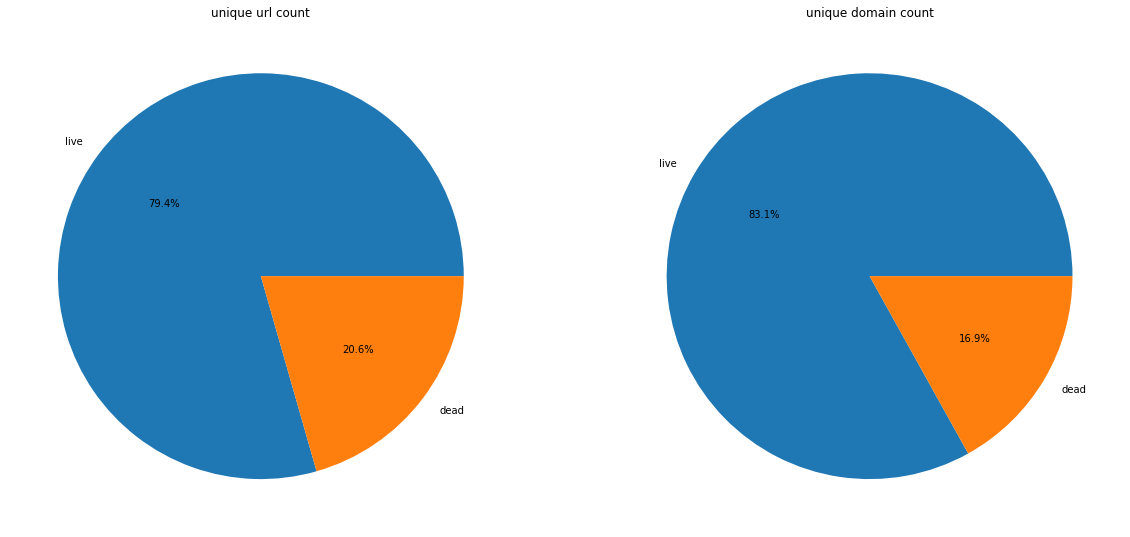

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1.pie([live_url_count, dead_url_count], labels=['live', 'dead'], autopct='%1.1f%%')
ax1.set_title('unique url count')
ax2.pie([live_domain_count, dead_domain_count], labels=['live', 'dead'], autopct='%1.1f%%')
ax2.set_title('unique domain count')
plt.show()

In [13]:
# df_url_unique contains all the information
df_url_unique.to_csv('../data/universe-' + date + '-url.csv')
# df_url_duplicate.to_csv('../data/universe-' + date + '-url-duplicate.csv')
df_url_live_unique.to_csv('../data/universe-' + date + '-url-live.csv')
df_url_dead_unique.to_csv('../data/universe-' + date + '-url-dead.csv')
df_domain_unique.to_csv('../data/universe-' + date + '-domain.csv')
df_domain_live_unique.to_csv('../data/universe-' + date + '-domain-live.csv')
df_domain_dead_unique.to_csv('../data/universe-' + date + '-domain-dead.csv')